In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [60]:
import statsmodels
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [18]:
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [6]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.drop('Serial No.',axis=1,inplace=True)

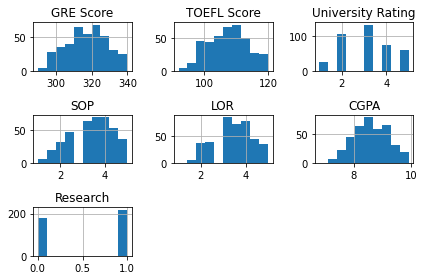

In [14]:
df.drop('Chance of Admit', axis = 1).hist()
plt.tight_layout()
plt.show()  

In [16]:
df.drop('Chance of Admit', axis = 1).skew()

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: float64

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


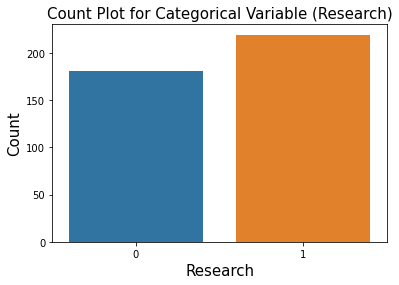

In [17]:
sns.countplot(df.Research)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (Research)', fontsize = 15)
plt.xlabel('Research', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

In [21]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [20]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [19]:
df.drop('Serial No.',axis=1,inplace=True)

In [96]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [20]:
df_num_scaled=df.drop('Chance of Admit',axis=1)

In [21]:
scaler=StandardScaler()
num_scaled=scaler.fit_transform(df_num_scaled)
df_num_scal= pd.DataFrame(num_scaled, columns = df_num_scaled.columns)

In [22]:
df_num_scal.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


In [27]:
X=df_num_scal
y=df['Chance of Admit']

In [13]:
X=X.drop('Serial No.',axis=1)

In [28]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


In [29]:

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state = 10, test_size = 0.2)

In [30]:
logreg=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.246939
         Iterations 8


In [31]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.6405
Time:                        17:11:05   Log-Likelihood:                -79.020
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 7.446e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.6107      0.424      1.439      0.150      -0.221       1.443
TOEFL Score           0.2469      0.396      0.623      0.533      -0.529       1.023
University Rating     0.

In [33]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

GRE Score             1.841660
TOEFL Score           1.280012
University Rating     1.987877
SOP                   1.184324
LOR                   1.692396
CGPA                 12.401981
Research              1.345755
dtype: float64

In [35]:
y_pred_prob =logreg.predict(x_test)

In [36]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [38]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[32,  4],
       [10, 34]], dtype=int64)

In [39]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Text(0.02, 0.9, "('AUC Score:', 0.8283)")

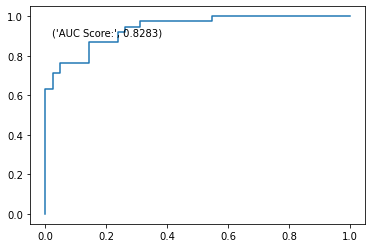

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

In [57]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        36
           1       0.89      0.77      0.83        44

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.83        80



In [53]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [54]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [55]:
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.724937,0.627119,0.973684,0.712500,0.438339,0.762887
1,0.200000,0.820175,0.725490,0.973684,0.812500,0.630086,0.831461
2,0.300000,0.818922,0.734694,0.947368,0.812500,0.629172,0.827586
3,0.400000,0.829574,0.760870,0.921053,0.825000,0.652605,0.833333
4,0.500000,0.828321,0.772727,0.894737,0.825000,0.651741,0.829268
5,0.600000,0.838972,0.804878,0.868421,0.837500,0.675406,0.835443
6,0.700000,0.862782,0.846154,0.868421,0.862500,0.724656,0.857143
7,0.800000,0.810150,0.828571,0.763158,0.812500,0.622642,0.794521
8,0.900000,0.844612,0.933333,0.736842,0.850000,0.696203,0.823529


In [64]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
303,0.540391,-0.067635,-0.076600,0.099442,0.052933,-0.082148,0.909112
349,-0.332263,-1.057420,-0.076600,-0.894980,-0.504260,-0.938469,-1.099975
149,-0.506794,-0.232599,-0.952029,0.099442,-0.504260,-0.569076,0.909112
100,0.453126,-0.067635,-0.076600,0.099442,0.052933,-0.233263,0.909112
175,0.278595,0.592221,0.798829,1.093864,0.052933,0.455151,0.909112


In [73]:
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select = 4)
rfe_model = rfe_model.fit(x_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = x_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['GRE Score', 'University Rating', 'LOR', 'CGPA'], dtype='object')


In [75]:
logreg_rfe = sm.Logit(y_train, x_train[[ 'GRE Score', 'University Rating', 'CGPA']]).fit()
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.258466
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.6237
Time:                        17:52:11   Log-Likelihood:                -82.709
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 2.963e-60
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.8758      0.356      2.463      0.014       0.179       1.573
Universi

In [80]:
ref_pred=logreg_rfe.predict(x_test[[ 'GRE Score', 'University Rating', 'CGPA']])